# Dissertation Code - Regression

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Import data

The data was downloaded from Bloomberg on:
* Exchange rate of Vietnam with its major trading partners: the China and the US
* Precious metal spot price and future price: Gold, Silver, Palladium, Platinum
* Global Stock Indices: Hang Seng Index, Nasdaq 100, Nasdaq Composite, Nikkei 225, SP500, DOJI, Shanghai Shenzhen CSI3000, Shanghai Shenzhen Composite and Singapore Stock Index
* Volatility stock index: VIX Index

In [2]:
com_data = ['Com_Fut_Gold.csv', # Index 0
            'Com_Fut_Palladium.csv', # Index 1
            'Com_Fut_Platinum.csv', # Index 2
            'Com_Fut_Silver.csv', # Index 3
            'Com_Spot_Brent.csv', # Index 4
            'Com_Spot_GoldPrice.csv', # Index 5
            'Com_Spot_Palladium.csv', # Index 6
            'Com_Spot_Platinum.csv', # Index 7
            'Com_Spot_Silver.csv', # Index 8
            'Com_Spot_WTI.csv'] # Index 9

xrate_data = ['Xrate_CNYVND.csv', # Index 0
              'Xrate_USDVND.csv'] # Index 1

indices_data = ['Index_DJI.csv', # Index 0
                'Index_HSI.csv', # Index 1
                'Index_Nasdaq100.csv', # Index 2
                'Index_NasdaqComposite.csv', # Index 3
                'Index_NKK225.csv', # Index 4
                'Index_SHSZ_CSI300.csv', # Index 5
                'Index_SICOM.csv', # Index 6
                'Index_SP500.csv', # Index 7
                'Index_SSEComp.csv', # Index 8
                'Index_STI.csv', # Index 9
                'Index_VIX.csv', # Index 10
                'Index_VNI.csv'] # Index 11
 
com_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in com_data]
xrate_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in xrate_data]
indices_dfs = [pd.read_csv(file, parse_dates= ['Date'], index_col= ['Date'], date_format= "%m/%d/%Y") for file in indices_data]

# Data Cleaning

## Check for total datapoints

In [3]:
# Check for total datapoints in dataframes commodity
for i in range(len(com_dfs)):
    print(com_data[i], ' ', len(com_dfs[i]))

Com_Fut_Gold.csv   4697
Com_Fut_Palladium.csv   4694
Com_Fut_Platinum.csv   4695
Com_Fut_Silver.csv   4695
Com_Spot_Brent.csv   5184
Com_Spot_GoldPrice.csv   5239
Com_Spot_Palladium.csv   5236
Com_Spot_Platinum.csv   5239
Com_Spot_Silver.csv   5242
Com_Spot_WTI.csv   5066


In [4]:
# Check for total datapoints in dfs Xrate
for i in range(len(xrate_dfs)):
    print(xrate_data[i], ' ', len(xrate_dfs[i]))

Xrate_CNYVND.csv   5216
Xrate_USDVND.csv   5113


In [5]:
# Check for total datapoints in dfs indices
for i in range(len(indices_dfs)):
    print(indices_data[i], ' ', len(indices_dfs[i]))

Index_DJI.csv   5064
Index_HSI.csv   4963
Index_Nasdaq100.csv   5064
Index_NasdaqComposite.csv   5064
Index_NKK225.csv   4928
Index_SHSZ_CSI300.csv   5113
Index_SICOM.csv   4527
Index_SP500.csv   4043
Index_SSEComp.csv   4892
Index_STI.csv   5054
Index_VIX.csv   4699
Index_VNI.csv   4996


## Balance the data

Since the datapoints are not equal, hence we will move the starting point to later time rather than 2003. We will set the starting date to 2008, the year before the Global Financial Crisis happen.

Before doing that, I have to turn all Date into datetime format. Since the data is download on BTS (British Summer Timezone), so we need to modify the date time correctly.

In [6]:
# Turn datetime in Commodity
for df in com_dfs:
    df.asfreq('B')
    
# Turn datetime in Exchange rate
for df in xrate_dfs:
    df.asfreq('B')

# Turn datetime in Indices
for df in indices_dfs:
    df.asfreq('B')

We will merge all the data together into one big data frame for easy doing EDA and examing the missing values.

In [7]:
# Get the name for all variables
com_name = [string[:-4] for string in com_data]
indices_name = [string[:-4] for string in indices_data]
xrate_name = [string[:-4] for string in xrate_data]

In [8]:
## Separate out all the individual data frames

# For commodity data
com_fut_gold = com_dfs[0]
com_fut_palladium = com_dfs[1]
com_fut_platinum = com_dfs[2]
com_fut_silver = com_dfs[3]
com_spot_brent = com_dfs[4]
com_spot_gold = com_dfs[5]
com_spot_palladium = com_dfs[6]
com_spot_platinum = com_dfs[7]
com_spot_silver = com_dfs[8]
com_spot_wti = com_dfs[9]

# For exchange rate data
xrate_cny = xrate_dfs[0]
xrate_usd = xrate_dfs[1]

# For global stock indices data
index_dji = indices_dfs[0]
index_hsi = indices_dfs[1]
index_nasdaq100 = indices_dfs[2]
index_nasdaq_composite = indices_dfs[3]
index_nkk225 = indices_dfs[4]
index_shsz_csi300 = indices_dfs[5]
index_sicomp = indices_dfs[6]
index_sp500 = indices_dfs[7]
index_ssecomp = indices_dfs[8]
index_sti = indices_dfs[9]
index_vix = indices_dfs[10]
index_vni = indices_dfs[11]


We need only the Last Price (Closing price) columns, so we modify the dataframe to take only that columns

In [9]:
# For commodity data
com_fut_gold = com_fut_gold.iloc[:,:1]
com_fut_palladium = com_fut_palladium.iloc[:,:1]
com_fut_platinum = com_fut_platinum.iloc[:,:1]
com_fut_silver = com_fut_silver.iloc[:,:1]
com_spot_brent = com_spot_brent.iloc[:,:1]
com_spot_gold = com_spot_gold.iloc[:,:1]
com_spot_palladium = com_spot_palladium.iloc[:,:1]
com_spot_platinum = com_spot_platinum.iloc[:,:1]
com_spot_silver = com_spot_silver.iloc[:,:1]
com_spot_wti = com_spot_wti.iloc[:,:1]

# For exchange rate data
xrate_cny = xrate_cny.iloc[:,:1]
xrate_usd = xrate_usd.iloc[:,:1]

# For global stock indices data
index_dji = index_dji.iloc[:,:1]
index_hsi = index_hsi.iloc[:,:1]
index_nasdaq100 = index_nasdaq100.iloc[:,:1]
index_nasdaq_composite = index_nasdaq_composite.iloc[:,:1]
index_nkk225 = index_nkk225.iloc[:,:1]
index_shsz_csi300 = index_shsz_csi300.iloc[:,:1]
index_sicomp = index_sicomp.iloc[:,:1]
index_sp500 = index_sp500.iloc[:,:1]
index_ssecomp = index_ssecomp.iloc[:,:1]
index_sti = index_sti.iloc[:,:1]
index_vix = index_vix.iloc[:,:1]
index_vni = index_vni.iloc[:,:1]

In [10]:
# Rename commodity data frame
com_fut_gold.rename(columns={'Last Price':'fut_gold'}, inplace= True)
com_fut_palladium.rename(columns={'Last Price':'fut_palladium'}, inplace= True)
com_fut_platinum.rename(columns={'Last Price':'fut_platinum'}, inplace= True)
com_fut_silver.rename(columns={'Last Price':'fut_silver'}, inplace= True)
com_spot_brent.rename(columns={'Last Price':'spot_brent'}, inplace= True)
com_spot_gold.rename(columns={'Last Price':'spot_gold'}, inplace= True)
com_spot_palladium.rename(columns={'Last Price':'spot_palladium'}, inplace= True)
com_spot_platinum.rename(columns={'Last Price':'spot_platinum'}, inplace= True)
com_spot_silver.rename(columns={'Last Price':'spot_silver'}, inplace= True)
com_spot_wti.rename(columns={'Last Price':'spot_wti'}, inplace= True)



# Rename exchange rate data frame
xrate_cny.rename(columns={'Last Price':'xrate_cny'}, inplace= True)
xrate_usd.rename(columns={'Last Price':'xrate_usd'}, inplace= True)

# Rename global stock indices rate data frame
index_dji.rename(columns={'Last Price':'index_dji'}, inplace= True)
index_hsi.rename(columns={'Last Price':'index_hsi'}, inplace= True)
index_nasdaq100.rename(columns={'Last Price':'index_nasdaq100'}, inplace= True)
index_nasdaq_composite.rename(columns={'Last Price':'index_nasdaq_comp'}, inplace= True)
index_nkk225.rename(columns={'Last Price':'index_nkk255'}, inplace= True)
index_shsz_csi300.rename(columns={'Last Price':'index_shsz_csi300'}, inplace= True)
index_sicomp.rename(columns={'Last Price':'index_sicomp'}, inplace= True)
index_sp500.rename(columns={'Last Price':'index_sp500'}, inplace= True)
index_ssecomp.rename(columns={'Last Price':'index_ssecomp'}, inplace= True)
index_sti.rename(columns={'Last Price':'index_sti'}, inplace= True)
index_vix.rename(columns={'Last Price':'index_vix'}, inplace= True)
index_vni.rename(columns={'Last Price':'index_vni'}, inplace= True)

Now we will join all the variables together

## Merging data together

In [11]:
# Create a merge list
merge_list = [com_fut_gold, com_fut_palladium, com_fut_platinum,
              com_spot_brent, com_spot_gold, com_spot_palladium, com_spot_platinum, com_spot_silver, com_spot_wti, xrate_cny, xrate_usd,
              index_dji, index_hsi, index_nasdaq100, index_nasdaq_composite, index_nkk225, index_shsz_csi300,
              index_sicomp, index_sp500, index_ssecomp, index_sti, index_vix,
              index_vni]

To ensure that we merge the dataframes without missing any date in any of the dataframe due to duplicate and missing dates in frame, we will create an uniform data frame with full date from July 2007 to 30th of June 2023

Most of the dataset start from 2003. However, the Shanghai Shenzhen CSI300 only started at 2007. Therefore, we will set the start date to merge for all dataframe to 2007-06-11

Now we will append all data in the merge list to this empty data frame to make our merging process complete

In [12]:
# Merging all df in merge_list
raw_data = merge_list[0]
for df in merge_list[1:]:
    raw_data = pd.concat([raw_data, df], axis = 1)

In [13]:
# Check the dataframe
raw_data

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2003-06-10,NaN,NaN,NaN,28.08,352.15,176.5,655.5,4.47,31.73,NaN,...,1212.99,1627.67,8789.09,NaN,NaN,NaN,1538.762,1419.05,NaN,152.23
2003-06-11,NaN,NaN,NaN,28.39,355.65,175.5,652.5,4.50,32.36,NaN,...,1228.24,1646.02,8890.30,NaN,NaN,NaN,1565.840,1427.73,NaN,152.25
2003-06-12,NaN,NaN,NaN,27.83,353.45,181.5,652.5,4.51,31.51,NaN,...,1229.32,1653.62,8918.60,NaN,NaN,NaN,1562.106,1462.28,NaN,152.40
2003-06-13,NaN,NaN,NaN,27.46,356.65,187.0,666.0,4.58,30.65,NaN,...,1203.91,1626.49,8980.64,NaN,NaN,NaN,1566.766,1464.24,NaN,152.20
2003-06-16,NaN,NaN,NaN,26.65,359.15,184.5,669.5,4.61,31.18,NaN,...,1241.58,1666.58,8839.83,NaN,NaN,NaN,1559.705,1449.62,NaN,151.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,1963.7,1281.2,967.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11021.29,NaN,NaN,NaN,13.86,NaN
2023-07-26,1970.1,1255.9,964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10968.98,NaN,NaN,NaN,13.19,NaN
2023-07-27,1945.7,1236.6,937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10923.77,NaN,NaN,NaN,14.41,NaN


There is a lot of missing data observed from the dataframe examination due to different downloaded timeframe. We will reform the data to start from 2005 to June 30th 2023.

In [14]:
# Modify the time range of the data
from datetime import datetime
data = raw_data[datetime(2007,1,1) : datetime(2023,6,30)]
data

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01,NaN,NaN,NaN,NaN,636.80,325.50,1134.50,12.9250,NaN,2057.1172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,638.0,NaN,NaN,60.44,640.50,335.50,1137.00,13.1850,61.05,2057.1172,...,NaN,NaN,NaN,16066.0,NaN,NaN,NaN,NaN,NaN,741.27
2007-01-03,629.8,342.05,1132.4,57.96,627.50,337.00,1125.50,12.5750,58.32,2056.9893,...,1759.37,2423.16,NaN,16055.0,NaN,NaN,NaN,2974.18,12.04,757.71
2007-01-04,626.2,345.55,1132.5,55.11,622.00,337.00,1120.50,12.5950,55.59,2055.3213,...,1792.91,2453.43,17353.67,16050.0,6705.34,NaN,2715.719,2965.02,11.51,788.82
2007-01-05,606.9,335.10,1109.0,55.64,607.40,335.00,1112.50,12.1950,56.31,2054.0173,...,1785.30,2434.25,17091.59,16055.0,6706.24,NaN,2641.334,2964.16,12.14,816.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,1923.7,1291.80,928.6,74.18,1923.26,1310.03,927.95,22.7905,69.37,3254.6433,...,14689.02,13335.78,32698.81,23534.0,10872.30,4328.82,3150.619,3189.68,14.25,1132.03
2023-06-27,1914.0,1283.20,928.5,72.26,1913.69,1298.72,926.96,22.8595,67.70,3258.1003,...,14945.91,13555.67,32538.33,23530.0,10978.08,4378.41,3189.443,3205.35,13.74,1134.33
2023-06-28,1912.3,1236.00,915.3,74.03,1907.32,1262.36,915.04,22.6975,69.56,3249.4656,...,14964.57,13591.75,33193.99,23551.0,10926.32,4376.86,3189.376,3207.28,13.43,1138.35


All the data is now combined into one dataframe. Now we will perform data wrangling.

### Deal with missing values

In [15]:
# Check for missing values
data.isnull().sum().sort_values(ascending= False)

index_ssecomp        296
index_sicomp         296
index_nkk255         269
index_sp500          262
index_hsi            241
index_vni            197
index_sti            163
index_nasdaq_comp    153
index_nasdaq100      153
index_dji            153
fut_palladium        148
fut_platinum         148
spot_wti             147
fut_gold             147
index_vix            144
xrate_usd            118
index_shsz_csi300    118
spot_brent            45
xrate_cny             18
spot_platinum         10
spot_gold             10
spot_palladium         9
spot_silver            6
dtype: int64

The missing values follow a patterns for different zones. It seems like Asian index (like SSE Composite, SiComp, Nikkei 225,...) all have similar number of missing dates. The same phenomenon happens for indices from the US (Dow John Index, Nasdaq,...) or with future commodities prices. In order to deal with time-series, we cannot simply just impute mean. Therefore, I would use the Simple Moving Average method.

In short term, the missing values with take the average value of 9 consecutive days before to ensure the trend and volatility of data.

In [16]:
# Replace missing values with mean of 9 previous days
for i in range(len(data)):
    for j in range(len(data.columns)):
        if pd.isna(data.iloc[i,j]):
            moving = data.iloc[i - 9, j].mean()
            data.iloc[i,j] = moving

In [17]:
# Recheck the data missing values
data.isnull().sum()

fut_gold             0
fut_palladium        0
fut_platinum         0
spot_brent           0
spot_gold            0
spot_palladium       0
spot_platinum        0
spot_silver          0
spot_wti             0
xrate_cny            0
xrate_usd            0
index_dji            0
index_hsi            0
index_nasdaq100      0
index_nasdaq_comp    0
index_nkk255         0
index_shsz_csi300    0
index_sicomp         1
index_sp500          0
index_ssecomp        1
index_sti            0
index_vix            0
index_vni            0
dtype: int64

In [18]:
# Check where is the missing data come from which date
bool_idx = data.isnull().any(axis=1)
data[bool_idx]

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,629.8,342.05,1132.4,57.96,627.5,337.0,1125.5,12.575,58.32,2056.9893,...,1759.37,2423.16,33264.88,16055.0,NaN,4381.89,NaN,2974.18,12.04,757.71


The missing data is just from the first 9 dates, so it has not enough data to calculate average. In this case, we jut simply move the first two dates so that we will have zero missing values in the dataset

In [19]:
# Slice the data to get rid of that two dates
data = data.loc[datetime(2007,7,1) : datetime(2023,6,30)]
data.isnull().sum()

fut_gold             0
fut_palladium        0
fut_platinum         0
spot_brent           0
spot_gold            0
spot_palladium       0
spot_platinum        0
spot_silver          0
spot_wti             0
xrate_cny            0
xrate_usd            0
index_dji            0
index_hsi            0
index_nasdaq100      0
index_nasdaq_comp    0
index_nkk255         0
index_shsz_csi300    0
index_sicomp         0
index_sp500          0
index_ssecomp        0
index_sti            0
index_vix            0
index_vni            0
dtype: int64

Great, now we have a dataset without missing values (filled with the average of 9 previous days). Lets come to the EDA part

## Exploratory Data Analysis

In [20]:
# Describe the data
data.describe()

,fut_gold,fut_palladium,fut_platinum,spot_brent,spot_gold,spot_palladium,spot_platinum,spot_silver,spot_wti,xrate_cny,...,index_nasdaq100,index_nasdaq_comp,index_nkk255,index_shsz_csi300,index_sicomp,index_sp500,index_ssecomp,index_sti,index_vix,index_vni
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,...,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,1376.130946,1022.041210,1214.149246,78.431605,1376.497660,1027.290549,1213.283133,20.434622,72.916302,3212.595162,...,5707.467358,5972.283353,17547.461164,21234.396886,10993.265396,2260.290129,2987.619891,3034.561279,20.478996,735.764041
std,323.463362,670.920676,329.392968,25.408001,323.224971,677.881578,328.648005,6.450763,23.296132,388.765739,...,4148.151048,3863.700578,6599.222580,2228.786620,2438.791372,1055.352200,673.854882,362.191131,9.249552,304.453259
min,648.300000,162.100000,596.800000,19.330000,649.500000,164.500000,591.200000,8.958800,-37.630000,2120.137200,...,1036.510000,1268.640000,7054.980000,15810.000000,5668.810000,676.530000,1706.703000,1456.950000,9.140000,235.500000
25%,1193.650000,585.725000,939.750000,57.540000,1193.760000,585.835000,939.550000,16.110350,52.775000,3192.264050,...,2306.190000,2723.700000,10607.645000,20817.000000,9323.065000,1354.535000,2515.976500,2871.050000,14.210000,489.695000
50%,1309.500000,765.450000,1100.900000,75.340000,1311.170000,765.900000,1100.000000,18.110500,72.140000,3361.131600,...,4341.300000,4800.340000,17099.400000,21815.000000,10708.820000,2049.580000,2998.483000,3128.750000,18.160000,614.420000
75%,1665.900000,1408.950000,1473.050000,103.745000,1664.660000,1425.245000,1473.295000,23.888400,92.550000,3456.244500,...,7636.545000,7961.010000,22360.490000,23028.500000,12420.620000,2887.915000,3288.936000,3256.390000,23.775000,973.865000
max,2055.700000,2981.400000,2276.100000,146.080000,2063.540000,3171.880000,2250.500000,48.443800,145.290000,3633.538600,...,16573.340000,16057.440000,33706.080000,24867.000000,19531.150000,4796.560000,6092.057000,3831.190000,82.690000,1528.570000


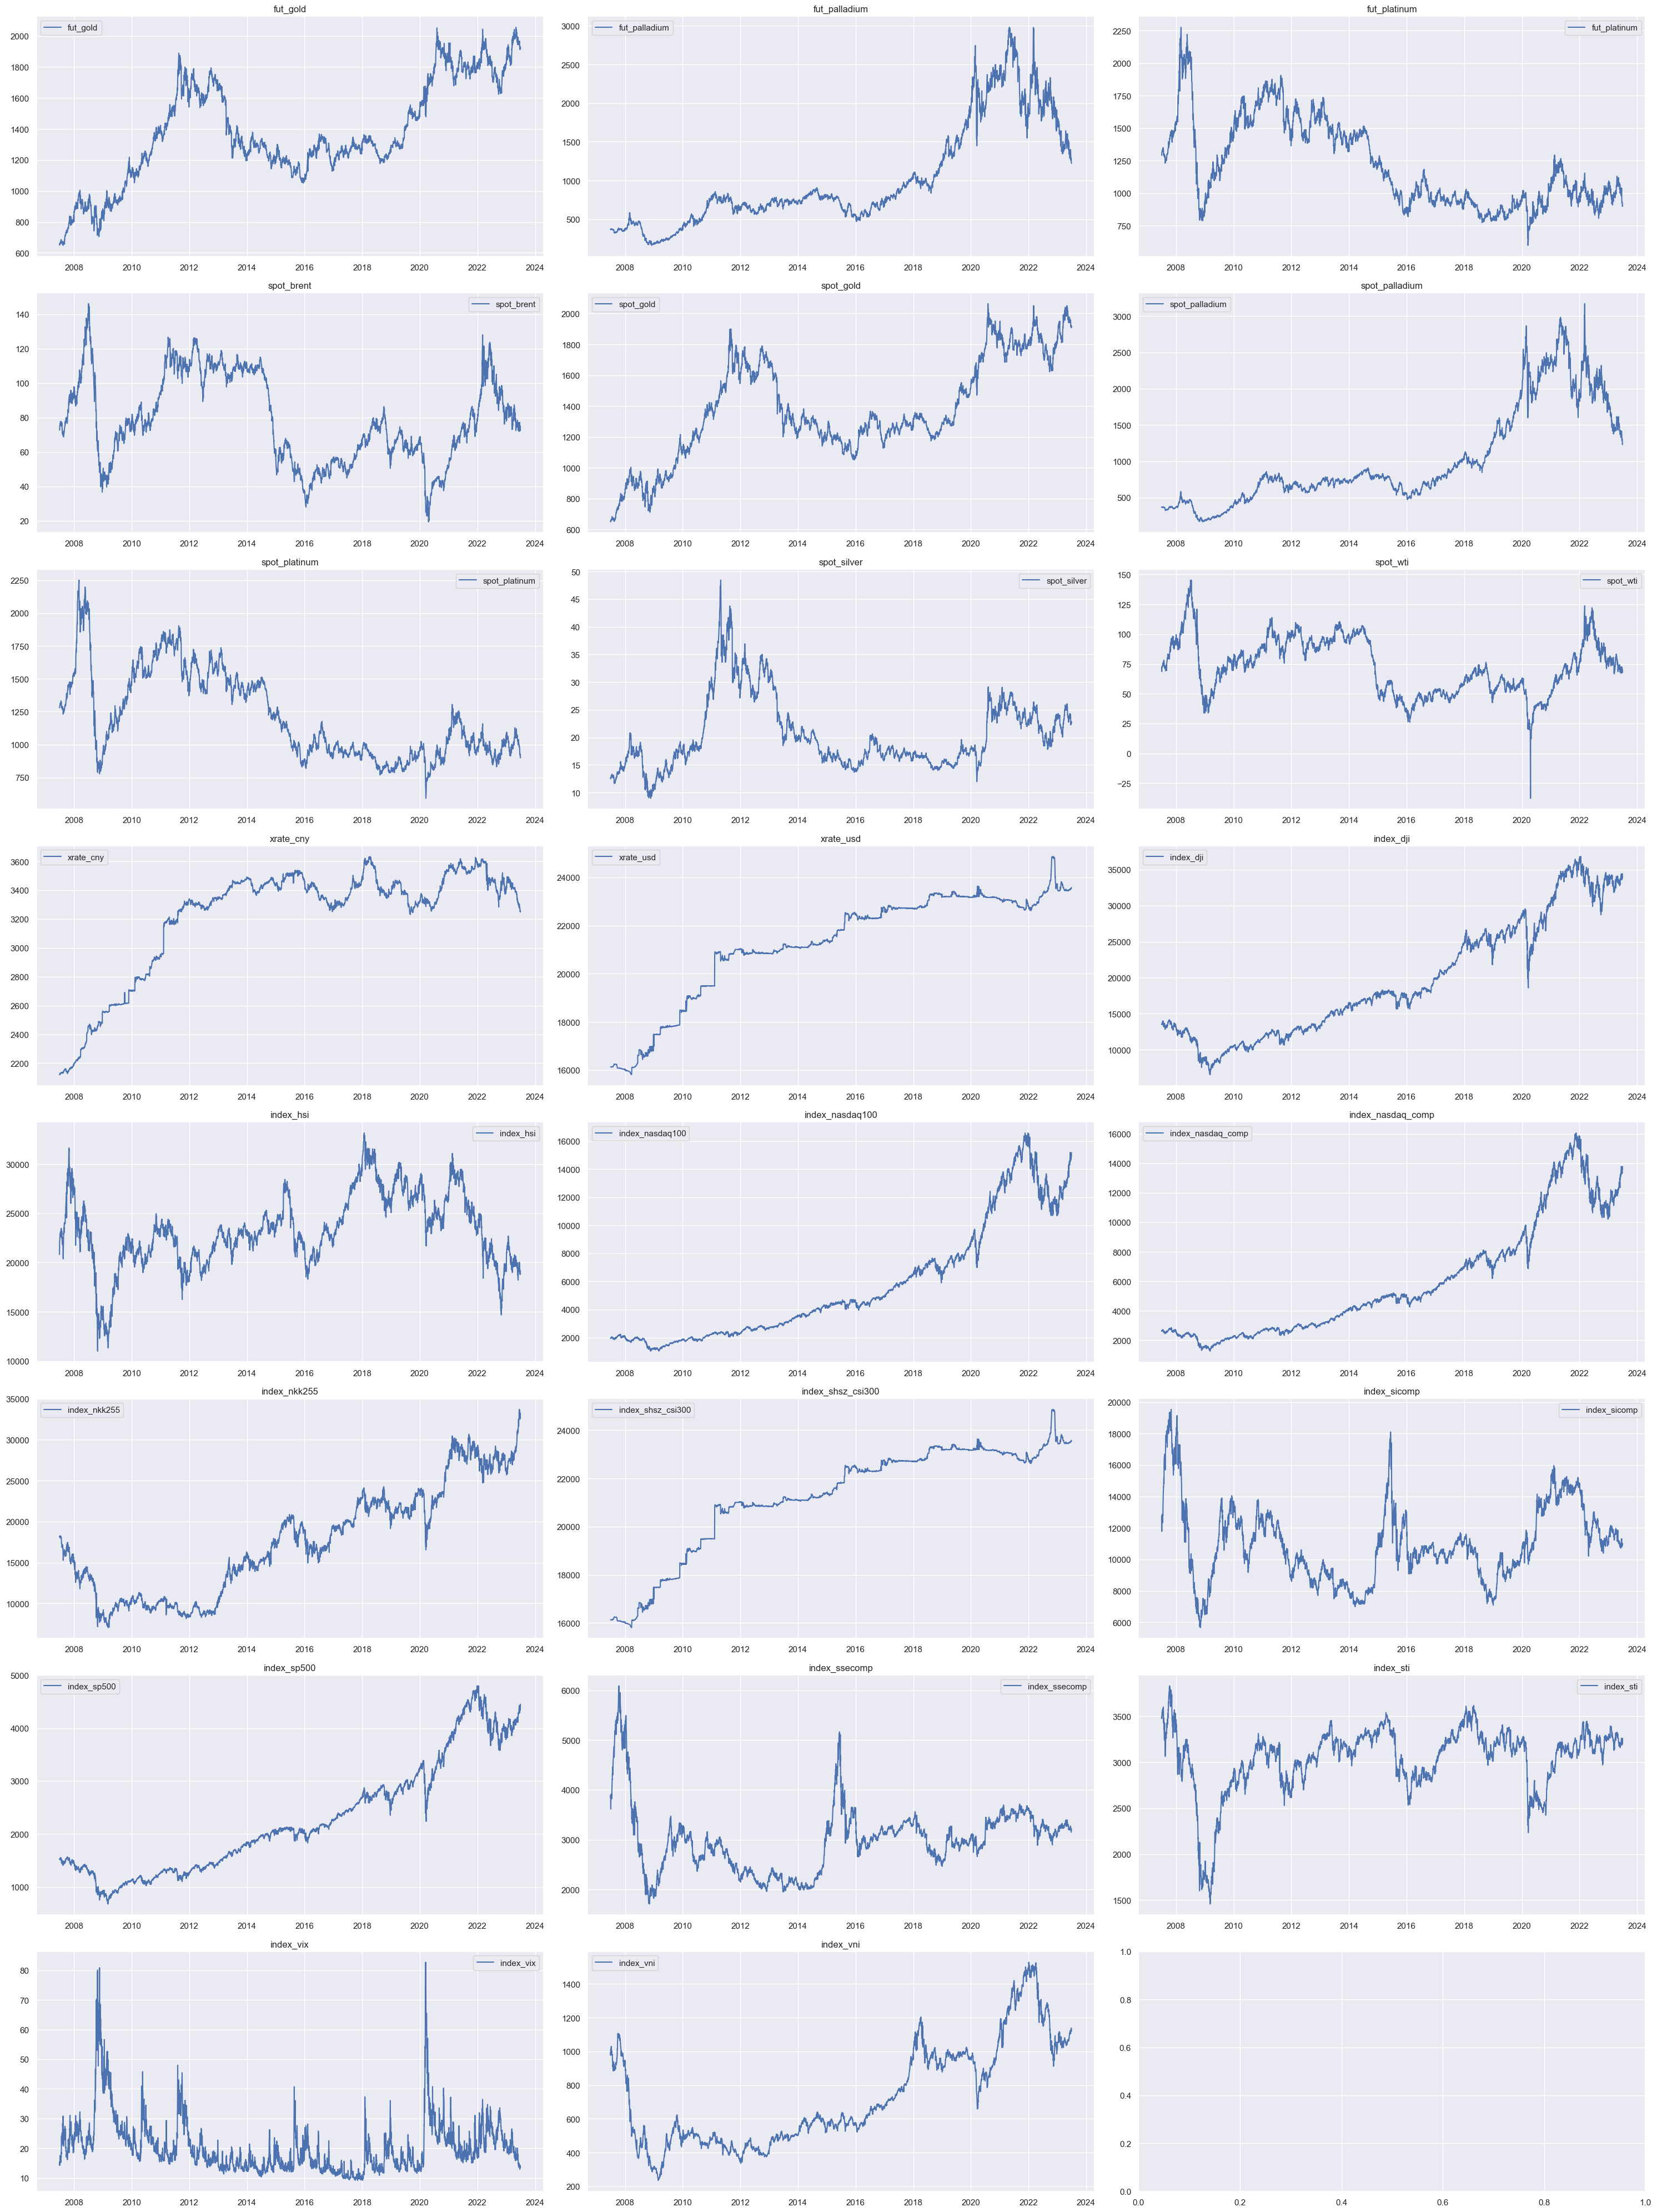

In [21]:
# Prepare the plots
num_cols = len(data.columns)
num_cols_per_row = 3

# Calculate number of rows needed for the plot
num_rows = (num_cols - 1) // num_cols_per_row + 1

# create the subplots
fig, ax = plt.subplots(num_rows, num_cols_per_row, figsize = (30,5 * num_rows))

# Flatten the axs array to make it easier to iterate
ax = ax.flatten()

# Iterate through columns and plot the line graphs
for i, column in enumerate(data.columns):
    ax[i].plot(data[column], label = column)
    ax[i].set_title(column)
    ax[i].legend()
    
# Avoid overlapping layout
plt.tight_layout()

# Show the plot
plt.show()

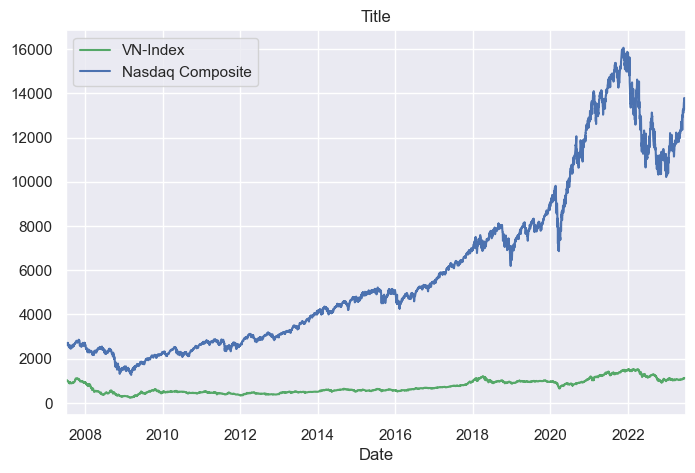

In [22]:
# Look for cointegration trace
fig, ax = plt.subplots(figsize = (8,5))
ax = data['index_vni'].plot(kind = 'line', color = 'g', label = 'VN-Index')
ax = data['index_nasdaq_comp'].plot(kind = 'line', color = 'b', label = 'Nasdaq Composite')
plt.title('Title')
plt.legend()
plt.show()

## Cointegration Test

In [23]:
# Check for stationarity
import statsmodels.tsa.stattools as ts
cols = []
p_values = []
statistics = []
for col in data.columns:
    result = ts.adfuller(data[col])
    p_value = result[1]
    cols.append(col)
    p_values.append(p_value)
    statistics.append(result[0])


stationary = pd.DataFrame(data = [p_values, statistics], columns = data.columns, index = ['p_value','Test_statistics'])
stationary = stationary.T
stationary['Stationary'] = np.where(stationary['p_value'] > 0.1, 'Non-stationary','Stationary')
stationary.sort_values(by = 'p_value', ascending = True)
    

,p_value,Test_statistics,Stationary
index_vix,0.000009,-5.192699,Stationary
xrate_cny,0.005612,-3.607903,Stationary
index_ssecomp,0.020614,-3.189273,Stationary
index_sicomp,0.025168,-3.119145,Stationary
index_sti,0.029614,-3.060550,Stationary
spot_wti,0.062419,-2.771779,Stationary
index_hsi,0.095131,-2.589764,Stationary
xrate_usd,0.166166,-2.318198,Non-stationary
index_shsz_csi300,0.166166,-2.318198,Non-stationary
spot_silver,0.179152,-2.278029,Non-stationary


In [24]:
# Cointegration test
import statsmodels.tsa.stattools as ts

cols = []
p_values = []

for column in data.drop('index_vni', axis = 1).columns:
    result = ts.coint(data['index_vni'], data[column], method = 'aeg', maxlag = 5)
    cols.append(column)
    p_values.append(result[1])


cointegration = pd.DataFrame(data = p_values)
cointegration.T
cointegration.index = cols
cointegration.rename(columns = {0 : 'p_value'}, inplace = True)
cointegration = cointegration.sort_values(by = 'p_value', ascending = True)
cointegration['Cointegrated'] = np.where(cointegration['p_value'] > 0.1, 'No cointegration','Cointegrated')
cointegration


,p_value,Cointegrated
index_dji,0.006289,Cointegrated
index_nasdaq_comp,0.011094,Cointegrated
index_sp500,0.011873,Cointegrated
index_nasdaq100,0.020529,Cointegrated
spot_palladium,0.093027,Cointegrated
fut_palladium,0.093900,Cointegrated
index_nkk255,0.126974,No cointegration
xrate_usd,0.317219,No cointegration
index_shsz_csi300,0.317219,No cointegration
fut_gold,0.409769,No cointegration


In [25]:
# Import test
from statsmodels.tsa.stattools import grangercausalitytests

# Define parameters
maxlag = 12
test = 'ssr_chi2test'

# Define test
def granger_causality_matrix(X_train, variables, test = test, verbose = False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag= maxlag, verbose= False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    
    dataset.index = [var + '_y' for var in variables]
    
    return dataset
granger_result = granger_causality_matrix(data, variables= data.columns)
granger_result

,fut_gold_x,fut_palladium_x,fut_platinum_x,spot_brent_x,spot_gold_x,spot_palladium_x,spot_platinum_x,spot_silver_x,spot_wti_x,xrate_cny_x,...,index_nasdaq100_x,index_nasdaq_comp_x,index_nkk255_x,index_shsz_csi300_x,index_sicomp_x,index_sp500_x,index_ssecomp_x,index_sti_x,index_vix_x,index_vni_x
fut_gold_y,1.0000,0.0064,0.0568,0.0017,0.0000,0.0001,0.0000,0.0000,0.0003,0.0067,...,0.0000,0.0000,0.0507,0.1065,0.3143,0.0002,0.5819,0.0357,0.0010,0.3119
fut_palladium_y,0.2619,1.0000,0.0309,0.0012,0.0000,0.0000,0.0000,0.0009,0.0158,0.0004,...,0.0000,0.0000,0.0128,0.0072,0.8981,0.0000,0.6996,0.0121,0.0000,0.0004
fut_platinum_y,0.0123,0.0147,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0002,...,0.0018,0.0012,0.0106,0.0243,0.0114,0.0000,0.0888,0.0004,0.0000,0.0085
spot_brent_y,0.3298,0.0588,0.0005,1.0000,0.1760,0.0011,0.0000,0.0020,0.0758,0.3519,...,0.0000,0.0000,0.0112,0.0020,0.0090,0.0000,0.1561,0.0287,0.0047,0.0262
spot_gold_y,0.0046,0.0531,0.0241,0.1154,1.0000,0.1248,0.0376,0.2828,0.0433,0.1022,...,0.0038,0.0034,0.0494,0.2084,0.2998,0.0030,0.3282,0.0047,0.0011,0.3806
spot_palladium_y,0.8777,0.0000,0.0799,0.0114,0.0775,1.0000,0.0553,0.4150,0.0090,0.0024,...,0.0000,0.0000,0.0013,0.0015,0.6244,0.0000,0.8573,0.1289,0.0204,0.0056
spot_platinum_y,0.0065,0.0405,0.0106,0.0161,0.1434,0.1086,1.0000,0.3636,0.0038,0.0267,...,0.0578,0.0304,0.0313,0.0544,0.0068,0.0032,0.0167,0.0698,0.0015,0.3390
spot_silver_y,0.0017,0.1866,0.0979,0.1433,0.1156,0.5080,0.1142,1.0000,0.1876,0.0180,...,0.2817,0.3214,0.3614,0.0230,0.1415,0.1845,0.4854,0.3727,0.0179,0.2426
spot_wti_y,0.0000,0.2224,0.0001,0.0000,0.0001,0.0007,0.0000,0.0000,1.0000,0.1957,...,0.0024,0.0023,0.0030,0.0000,0.0108,0.0000,0.1210,0.0001,0.0000,0.0573
xrate_cny_y,0.0332,0.0268,0.0216,0.1293,0.0011,0.2097,0.0003,0.0114,0.0586,1.0000,...,0.0000,0.0000,0.0892,0.0000,0.7118,0.0000,0.3455,0.3000,0.3178,0.0062


In [26]:
# Examine potential variables to predict vn-index
granger_result.loc['index_vni_y'].T.sort_values(ascending = True)

index_dji_x            0.0000
index_nkk255_x         0.0000
index_nasdaq_comp_x    0.0000
index_nasdaq100_x      0.0000
index_hsi_x            0.0000
index_vix_x            0.0000
index_sti_x            0.0000
spot_wti_x             0.0000
xrate_cny_x            0.0000
spot_platinum_x        0.0000
spot_palladium_x       0.0000
spot_brent_x           0.0000
fut_palladium_x        0.0000
index_sp500_x          0.0000
fut_platinum_x         0.0004
xrate_usd_x            0.0012
index_shsz_csi300_x    0.0012
spot_silver_x          0.0071
spot_gold_x            0.0144
fut_gold_x             0.0159
index_ssecomp_x        0.6151
index_sicomp_x         0.7480
index_vni_x            1.0000
Name: index_vni_y, dtype: float64

In [27]:
# Create dataset with only cointegrated and passed the granger causality test
df = data[['index_dji','index_nasdaq_comp','index_sp500','spot_palladium','index_vni']]
df.head()

,index_dji,index_nasdaq_comp,index_sp500,spot_palladium,index_vni
Date,,,,,
2007-07-02,13535.43,2632.30,1519.43,368.5,994.17
2007-07-03,13577.30,2644.95,1524.87,365.0,977.30
2007-07-04,13545.84,2616.96,1522.19,366.0,1013.56
2007-07-05,13565.84,2656.65,1525.40,365.5,1012.82
2007-07-06,13611.68,2666.51,1530.44,367.0,1010.53


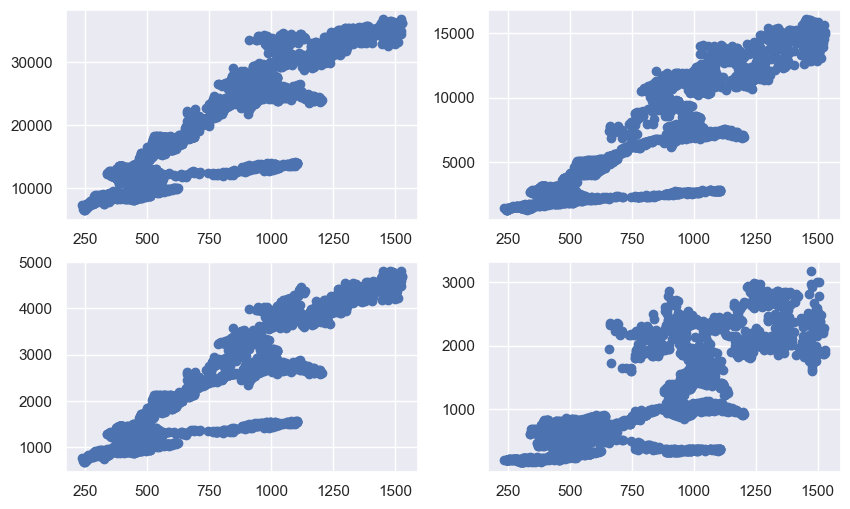

In [28]:
# Check the scatter plot between variables
y = df['index_vni']
fix, ax = plt.subplots(2,2, figsize = (10,6))
ax[0,0].scatter(y, df['index_dji'])
ax[0,1].scatter(y, df['index_nasdaq_comp'])
ax[1,0].scatter(y, df['index_sp500'])
ax[1,1].scatter(y, df['spot_palladium'])
plt.show()

Because Index SP500, nasdaq and DJI has a very high correlation, so their patterns behave exactly the same with VN-Index. Therefore, we will keep only Palladium spot price and SP500 as input variables for VN-index prediction

In [29]:
# Keep only significant variables
df = df[['index_sp500','spot_palladium','index_vni']]

In [30]:
# Generate log return
log_returns = np.log(df).diff()
log_returns.dropna(inplace= True)
log_returns.reset_index(inplace= True)
log_returns.replace([np.inf, -np.inf], np.nan, inplace = True)
log_returns = log_returns.dropna()
log_returns.head()

,Date,index_sp500,spot_palladium,index_vni
0,2007-07-03,0.003574,-0.009543,-0.017115
1,2007-07-04,-0.001759,0.002736,0.036430
2,2007-07-05,0.002107,-0.001367,-0.000730
3,2007-07-06,0.003299,0.004096,-0.002264
4,2007-07-09,0.000921,0.002721,-0.000257


In [31]:
log_returns.mean()

Date              2015-07-01 16:47:43.440344832
index_sp500                            0.000257
spot_palladium                         0.000289
index_vni                              0.000029
dtype: object

In [32]:
# Import test
from statsmodels.tsa.stattools import grangercausalitytests

# Define parameters
maxlag = 12
test = 'ssr_chi2test'

# Define test
def granger_causality_matrix(X_train, variables, test = test, verbose = False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns = variables, index = variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(X_train[[r,c]], maxlag= maxlag, verbose= False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    
    dataset.index = [var + '_y' for var in variables]
    
    return dataset
granger_result = granger_causality_matrix(df, variables= df.columns)
granger_result

,index_sp500_x,spot_palladium_x,index_vni_x
index_sp500_y,1.0,0.1347,0.0004
spot_palladium_y,0.0,1.0000,0.0056
index_vni_y,0.0,0.0000,1.0000


In [33]:
# plots the spread on the return series data
import statsmodels.api as sm
A1 = log_returns["index_vni"]
A2 = log_returns["index_sp500"]
A1 = sm.add_constant(A1)
results = sm.OLS(A2, A1).fit()

A1 = A1["index_vni"]
b1 = results.params["index_vni"]


Text(0.5, 1.0, 'Spread between log different of SP500 and VNIndex')

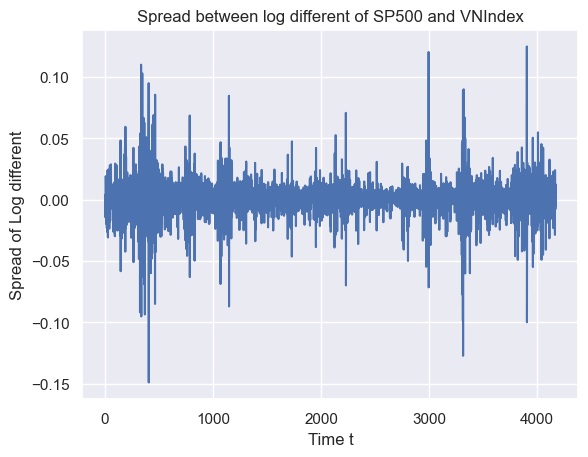

In [34]:
# Check spread
spread1 = A2.values - b1 * A1.values
plt.plot(spread1)
plt.xlabel('Time t')
plt.ylabel('Spread of Log different')
plt.title('Spread between log different of SP500 and VNIndex')

In [35]:
# plots the spread on the return series data
import statsmodels.api as sm
A1 = log_returns["index_vni"]
A3 = log_returns["spot_palladium"]
A1 = sm.add_constant(A1)
results = sm.OLS(A3, A1).fit()

A1 = A1["index_vni"]
b2 = results.params["index_vni"]

Text(0.5, 1.0, 'Spread between log different of spot price Palladium and VNIndex')

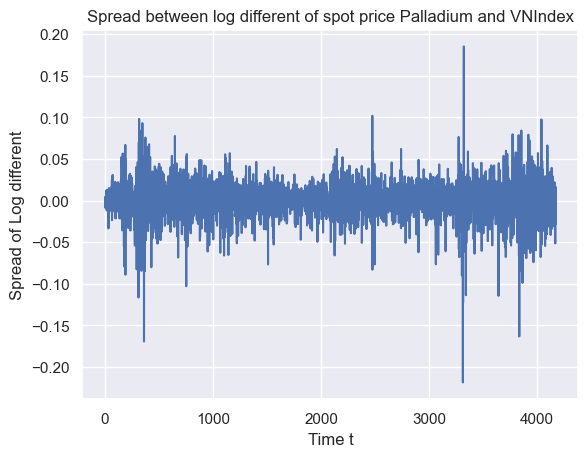

In [36]:
# Check spread
spread2 = A3.values - b2 * A1.values
plt.plot(spread2)
plt.xlabel('Time t')
plt.ylabel('Spread of Log different')
plt.title('Spread between log different of spot price Palladium and VNIndex')

## Machine Learning for Regressions

In [37]:
def split(df, target):
    # Define target and predictors
    X = df.drop('index_vni', axis = 1)
    y = df['index_vni']

    # Define train set, cv test and test set
    train_time = int(round(0.7 * len(df)))
    cv_time = int(round(0.1 * len(df)))

    X_train = X.iloc[:train_time]
    X_cv = X.iloc[train_time : (train_time + cv_time)]
    X_test = X.iloc[(train_time + cv_time):]

    y_train = y.iloc[:train_time]
    y_cv = y.iloc[train_time : (train_time + cv_time)]
    y_test = y.iloc[(train_time + cv_time):]
    return X_train, X_cv, X_test, y_train, y_cv, y_test

In [38]:
# Import and call out object
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

lr = LinearRegression()
svr = SVR()
xgb = XGBRegressor()
dtr = DecisionTreeRegressor()

In [39]:
# Import scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# Define target and predictors
X = df.drop('index_vni', axis = 1)
y = df['index_vni']

# Define train set, cv test and test set
train_time = int(round(0.7 * len(df)))
cv_time = int(round(0.1 * len(df)))

X_train = X.iloc[:train_time]
X_cv = X.iloc[train_time : (train_time + cv_time)]
X_test = X.iloc[(train_time + cv_time):]

y_train = y.iloc[:train_time]
y_cv = y.iloc[train_time : (train_time + cv_time)]
y_test = y.iloc[(train_time + cv_time):]

# Test the shape
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

(2922, 2)
(418, 2)
(835, 2)
(2922,)
(418,)
(835,)


In [41]:
# Scale the variables
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [43]:
# Define model
def rmse(mse):
    rmse = np.sqrt(mse)
    return rmse

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model} errors: \n"
          f"MAE: {mae(y_test, y_pred)} \n"
          f"MSE: {mse(y_test, y_pred)} \n"
          f"RMSE : {rmse(mse(y_test, y_pred))}")

In [44]:
models = [lr, dtr, xgb, svr]

for model in models:
    evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)

LinearRegression() errors: 
MAE: 227.73829892200595 
MSE: 56910.37648588324 
RMSE : 238.55895809187973
DecisionTreeRegressor() errors: 
MAE: 59.373875598086116 
MSE: 7363.318579904305 
RMSE : 85.80978137662574


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 96.14788552608215 
MSE: 11183.554272526882 
RMSE : 105.75232514005015
SVR() errors: 
MAE: 294.3320905758111 
MSE: 95066.1236659541 
RMSE : 308.327948240107


It seems like regression task on level time-series data is not effective and will not work at all. The error is too high. We will perform regression on the log differencing of time-series data

In [45]:
# Test with log return data set
df2 = log_returns.set_index('Date')

# Train test split
X_train, X_cv, X_test, y_train, y_cv, y_test = split(df2, 'index_vni')

In [46]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [47]:
models = [lr, dtr, xgb, svr]

for model in models:
    evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)

LinearRegression() errors: 
MAE: 0.007099360957437103 
MSE: 0.00012483957375140095 
RMSE : 0.011173163104125928
DecisionTreeRegressor() errors: 
MAE: 0.013848826167718924 
MSE: 0.00038517777922991595 
RMSE : 0.019625946581755385


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 0.009274213049702426 
MSE: 0.0001769888323877934 
RMSE : 0.013303714984461798
SVR() errors: 
MAE: 0.024580961023774217 
MSE: 0.0009073273485512258 
RMSE : 0.030121874917594785


In [48]:
models = [lr, dtr, xgb, svr]

for model in models:
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

LinearRegression() errors: 
MAE: 0.00990344530483405 
MSE: 0.00021259258998976305 
RMSE : 0.014580555201698014
DecisionTreeRegressor() errors: 
MAE: 0.01697730327988419 
MSE: 0.0005824063544128625 
RMSE : 0.02413309666024778
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 0.011860796538050757

With the values mean for the target variable is 0.00029, then the MAE, MSE and RMSE is very high, hence the model is not very accurate. We will generate a dataset that includes the spread of sp500 and palladium. We will do that by calculating the spread like we did with OLC models above as follow:

$ spread = log_{sp500}(\frac{p_t}{p_{t-1}}) - b \times log_{vni}(\frac{p_t}{p_{t-1}})$

With $b$ is the beta coefficient generated from OLS models above

In [49]:
# Generate set
df3 = df2.copy()
df3['vni_sp500_spread'] = df3['index_sp500'] - b1 * df3['index_vni']
df3['vni_palladium_spread'] = df3['spot_palladium'] - b2 * df3['index_vni']

In [50]:
# Train test split
X_train, X_cv, X_test, y_train, y_cv, y_test = split(df3, 'index_vni')

In [51]:
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [52]:
models = [lr, dtr, xgb, svr]

for model in models:
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

LinearRegression() errors: 
MAE: 1.7348132310368946e-16 
MSE: 5.46829526340985e-32 
RMSE : 2.338438637939822e-16
DecisionTreeRegressor() errors: 
MAE: 0.006605025679502775 
MSE: 0.00012657904290166384 
RMSE : 0.01125073521604983


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 0.004786365570590282 
MSE: 6.009397115363155e-05 
RMSE : 0.0077520301311096275
SVR() errors: 
MAE: 0.019051956323392256 
MSE: 0.00055384191918938 
RMSE : 0.023533846247253763


All others regressors returned pretty inaccurate results. However, a linear regression model returns a quite low error, indicating that there is an linear relationship between these markets.

In [53]:
# Generate set
df4 = df3.drop(['index_sp500','spot_palladium'], axis = 1)
df4

,index_vni,vni_sp500_spread,vni_palladium_spread
Date,,,
2007-07-03,-0.017115,0.003959,-0.008422
2007-07-04,0.036430,-0.002578,0.000349
2007-07-05,-0.000730,0.002123,-0.001319
2007-07-06,-0.002264,0.003350,0.004244
2007-07-09,-0.000257,0.000927,0.002738
...,...,...,...
2023-06-26,0.002344,-0.004550,0.016588
2023-06-27,0.002030,0.011345,-0.008804
2023-06-28,0.003538,-0.000434,-0.028628


In [54]:
# Train test split
X_train, X_cv, X_test, y_train, y_cv, y_test = split(df4, 'index_vni')

In [55]:
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Evaluate model
models = [lr, dtr, xgb, svr]

for model in models:
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

LinearRegression() errors: 
MAE: 0.0098474688395102 
MSE: 0.0002110977240251522 
RMSE : 0.014529202456609661
DecisionTreeRegressor() errors: 
MAE: 0.0160423681977963 
MSE: 0.00047981337786570747 
RMSE : 0.02190464283812241


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 0.011748761318856788 
MSE: 0.0002736968814433005 
RMSE : 0.016543786792729786
SVR() errors: 
MAE: 0.022902171170059472 
MSE: 0.0007904923648076082 
RMSE : 0.028115696057675832


To confirm that our predictors actually have a meaning in assisting the VN-index log return prediction, we will perform the model on the target variable only

In [56]:
# Generate data
df5 = df4[['index_vni']]
df5

,index_vni
Date,
2007-07-03,-0.017115
2007-07-04,0.036430
2007-07-05,-0.000730
2007-07-06,-0.002264
2007-07-09,-0.000257
...,...
2023-06-26,0.002344
2023-06-27,0.002030
2023-06-28,0.003538


In [57]:
# Define X and Y
X = list(range(len(df5))) # The X variable is the time itself
y = df5['index_vni']

# Train test split
X_train = np.array(X[:train_time]).reshape(-1,1)
X_cv = np.array(X[train_time : (train_time + cv_time)]).reshape(-1,1)
X_test = np.array(X[(train_time + cv_time):]).reshape(-1,1)

y_train = y.iloc[:train_time]
y_cv = y.iloc[train_time : (train_time + cv_time)]
y_test = y.iloc[(train_time + cv_time):]

In [58]:
# Perform the model
for model in models:
    evaluate_model(model, X_train, y_train, X_cv, y_cv)

LinearRegression() errors: 
MAE: 0.00720800014271376 
MSE: 0.0001308869381064022 
RMSE : 0.011440582944343448
DecisionTreeRegressor() errors: 
MAE: 0.007330463647191695 
MSE: 0.00013348395309942728 
RMSE : 0.01155352557012046


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) errors: 
MAE: 0.007441127842789262 
MSE: 0.00013582332834475365 
RMSE : 0.011654326593362383
SVR() errors: 
MAE: 0.0079762373754772 
MSE: 0.00013937289647238308 
RMSE : 0.011805629863433085


With normal Linear Regression, we achieved a very good result! All others achieved good result as well. However, we will use the result from Linear Rerression models

In [59]:
# Re-fit the model to LR
# Generate set
df3 = df2.copy()
df3['vni_sp500_spread'] = df3['index_sp500'] - b1 * df3['index_vni']
df3['vni_palladium_spread'] = df3['spot_palladium'] - b2 * df3['index_vni']

# Train test split
X_train, X_cv, X_test, y_train, y_cv, y_test = split(df3, 'index_vni')

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Fit the model
lr.fit(X_train_scaled, y_train)
y_pred_cv = lr.predict(X_cv_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Calculate error
print(f"CV error: \n"
      f"MAE: {mae(y_cv, y_pred_cv)} \n"
      f"MSE: {mse(y_cv, y_pred_cv)} \n"
      f"RMSE: {rmse(mse(y_cv, y_pred_cv))}")

# Calculate error
print(f"Test error: \n"
      f"MAE: {mae(y_test, y_pred_test)} \n"
      f"MSE: {mse(y_test, y_pred_test)} \n"
      f"RMSE: {rmse(mse(y_test, y_pred_test))}")

CV error: 
MAE: 1.5553449727945832e-16 
MSE: 7.007707488777111e-32 
RMSE: 2.647207488803458e-16
Test error: 
MAE: 1.7348132310368946e-16 
MSE: 5.46829526340985e-32 
RMSE: 2.338438637939822e-16


## Turn into actual prediction

Since this is the log of different, therefore we need to exponent them and translate into actual change. What we can notice here is that the trading time of the US is closed 12 hours before the close time of VN-Index trading. Therefore, once the market in Vietnam closed at time t, we will already have enough information to predict the next day change.

In [60]:
# Turn into actual change
pred_cv = np.exp(y_pred_cv)
pred_test = np.exp(y_pred_test)

# Check first 10 samples
pred_cv[:10]

array([1.00095237, 1.00343135, 0.99623742, 1.00595377, 1.00206343,
       1.00924122, 0.99823835, 1.00829536, 0.99945614, 0.99888201])

The above values are the normalization of the returns, calculated as follow:


$r_t = log(1 + R_{t}) = log(\frac{P_t}{P_{t-1}}) = log(P_t) - log(P_{t-1})$

To inverse the values back to $R_t$, we need to perform the following equation:

$return_t = R_t - 1$

In [61]:
# Inverse into actual return
pred_cv = pred_cv - 1
pred_test = pred_test - 1

417


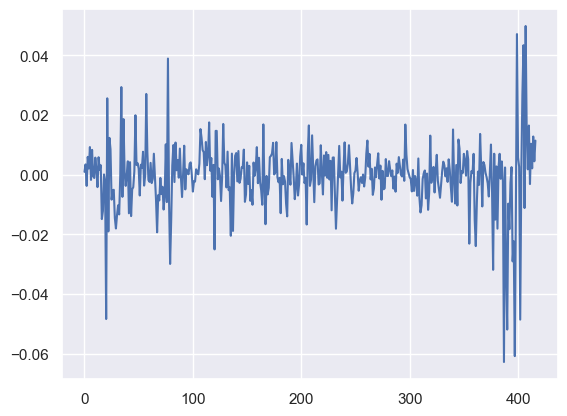

In [62]:
# Visualize the return
plt.plot(pred_cv)
print(len(pred_cv))

417


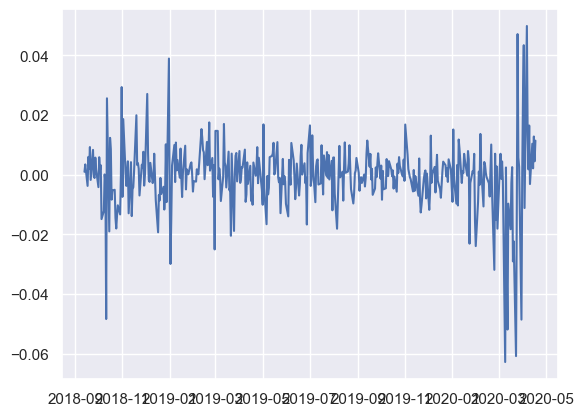

In [63]:
# Compare to actual return
test_time = data['index_vni'].iloc[train_time : (train_time + cv_time)]
test_time = test_time.pct_change()
test_time.dropna(inplace = True)
plt.plot(test_time)
print(len(test_time))

We can see that the pattern of prediction is very much like the pattern of return in cv time. It is time for us to translate into actual change and compare prediction with actual movements

In [64]:
# Generate price of Vn-index
vni_index = data[['index_vni']]
vni_index.rename(columns = {'index_vni' : 'Close'}, inplace= True)

# Generate the return column
vni_index['Actual_return'] = vni_index['Close'].pct_change()

# Generate dataset with same length with prediction
vni_index_test = vni_index.iloc[(train_time + 1):]

In [65]:
# Combine two prediction numpy
pred = np.concatenate([pred_cv, pred_test])
#pred = pd.DataFrame(data = pred, columns = ['Pred_return'], index = vni_index_test.index)

# Combine the two dataframe
vni_index_test['Pred_return'] = pred


In [66]:
# Check first 10 values
vni_index_test.head(10)

,Close,Actual_return,Pred_return
Date,,,
2018-09-13,987.95,0.000952,0.000952
2018-09-14,991.34,0.003431,0.003431
2018-09-17,987.61,-0.003763,-0.003763
2018-09-18,993.49,0.005954,0.005954
2018-09-19,995.54,0.002063,0.002063
2018-09-20,1004.74,0.009241,0.009241
2018-09-21,1002.97,-0.001762,-0.001762
2018-09-24,1011.29,0.008295,0.008295
2018-09-25,1010.74,-0.000544,-0.000544


In [67]:
# Check statistics
vni_index_test.describe()

,Close,Actual_return,Pred_return
count,1252.000000,1252.000000,1252.000000
mean,1092.053562,0.000193,0.000193
std,199.584104,0.013485,0.013485
min,659.210000,-0.081611,-0.081611
25%,954.760000,-0.004657,-0.004657
50%,1028.635000,0.000953,0.000953
75%,1247.520000,0.006455,0.006455
max,1528.570000,0.065738,0.065738


In [68]:
# Predict close price of vn-index
pred_close = []
for i in range(len(vni_index_test) - 1):
    pred_price = vni_index_test['Close'].iloc[i] *  (1 + vni_index_test['Pred_return'].iloc[i + 1])
    pred_close.append(pred_price)

In [69]:
# Append to the dataframe
vni_index_test = vni_index_test.iloc[1:]
vni_index_test['Pred_close'] = pred_close
vni_index_test.head(10)

,Close,Actual_return,Pred_return,Pred_close
Date,,,,
2018-09-14,991.34,0.003431,0.003431,991.34
2018-09-17,987.61,-0.003763,-0.003763,987.61
2018-09-18,993.49,0.005954,0.005954,993.49
2018-09-19,995.54,0.002063,0.002063,995.54
2018-09-20,1004.74,0.009241,0.009241,1004.74
2018-09-21,1002.97,-0.001762,-0.001762,1002.97
2018-09-24,1011.29,0.008295,0.008295,1011.29
2018-09-25,1010.74,-0.000544,-0.000544,1010.74
2018-09-26,1009.61,-0.001118,-0.001118,1009.61


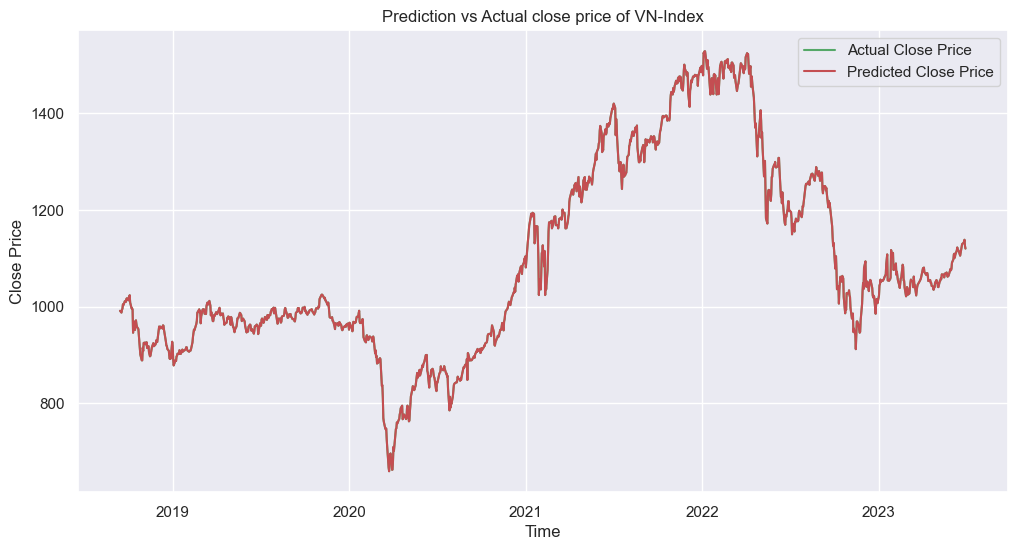

In [70]:
# Visualize the prediction and actual
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(vni_index_test['Close'], color = 'g', label = 'Actual Close Price')
ax.plot(vni_index_test['Pred_close'], color = 'r', label = 'Predicted Close Price')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Close Price')
plt.title('Prediction vs Actual close price of VN-Index')
plt.show()

The predictions fit too well. I am quite worry that there something wrong with the model.

In [75]:
X_test

,index_sp500,spot_palladium,vni_sp500_spread,vni_palladium_spread
Date,,,,
2020-04-20,-0.018043,0.002259,-0.018195,0.001815
2020-04-21,-0.031155,-0.116019,-0.030345,-0.113659
2020-04-22,0.022671,0.003351,0.022610,0.003174
2020-04-23,-0.000540,0.018955,-0.000685,0.018531
2020-04-24,0.013822,0.028429,0.013742,0.028196
...,...,...,...,...
2023-06-26,-0.004497,0.016742,-0.004550,0.016588
2023-06-27,0.011391,-0.008671,0.011345,-0.008804
2023-06-28,-0.000354,-0.028396,-0.000434,-0.028628


## Retest, re-fit the coefficents

In [77]:
def split_data(df, target):
    # Define time
    train_time = int(round(len(df) * 0.7))
    cv_time = int(round(len(df) * 0.1))
    
    # Splitting data
    X = df.drop(target, axis = 1)
    y = df[target]
    
    X_train = X.iloc[:train_time]
    X_cv = X.iloc[train_time : (train_time + cv_time)]
    X_test = X.iloc[(train_time + cv_time):]
    
    y_train = y.iloc[:train_time]
    y_cv = y.iloc[train_time : (train_time + cv_time)]
    y_test = y.iloc[(train_time + cv_time):]
    return X_train, y_train, X_cv, y_cv, X_test, y_test
    

In [89]:
# Generate data
df6 = np.log(df).diff()
df6.dropna(inplace = True)

# Split data
X_train, y_train, X_cv, y_cv, X_test, y_test = split_data(df6, 'index_vni')

Beta coefficient value: 0.010783679609943185


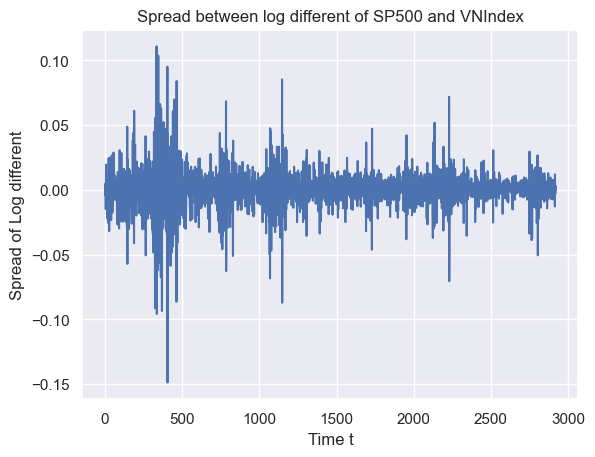

In [93]:
# Fit the OLS to get b coefficient on train models
import statsmodels.api as sm
A1 = y_train
A2 = X_train["index_sp500"]
A1 = sm.add_constant(A1)
results = sm.OLS(A2, A1).fit()

A1 = A1["index_vni"]
b1 = results.params["index_vni"]

# Visualize the spread
spread1 = A2.values - b2 * A1.values
plt.plot(spread1)
plt.xlabel('Time t')
plt.ylabel('Spread of Log different')
plt.title('Spread between log different of SP500 and VNIndex')
print(f"Beta coefficient value: {b1}")

Beta coefficient value: 0.010783679609943185


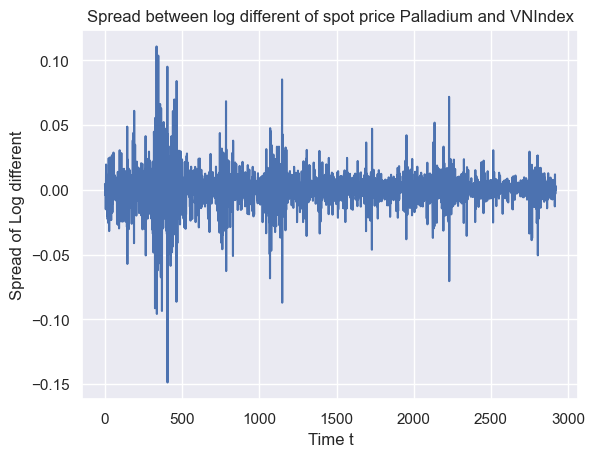

In [92]:
# Fit the OLS to get b coefficient on train models
import statsmodels.api as sm
A1 = y_train
A3 = X_train["spot_palladium"]
A1 = sm.add_constant(A1)
results = sm.OLS(A3, A1).fit()

A1 = A1["index_vni"]
b2 = results.params["index_vni"]

# Visualize the spread
spread2 = A2.values - b2 * A1.values
plt.plot(spread2)
plt.xlabel('Time t')
plt.ylabel('Spread of Log different')
plt.title('Spread between log different of spot price Palladium and VNIndex')
print(f"Beta coefficient value: {b1}")

In [95]:
# Generate the data with spread
df6['spread_sp500'] = df6['index_sp500'] - b1 * df6['index_vni']
df6['spread_palladium'] = df6['spot_palladium'] - b2 * df6['index_vni']
df6.head()

,index_sp500,spot_palladium,index_vni,spread_sp500,spread_palladium
Date,,,,,
2007-07-03,0.003574,-0.009543,-0.017115,0.003758,-0.008565
2007-07-04,-0.001759,0.002736,0.036430,-0.002152,0.000652
2007-07-05,0.002107,-0.001367,-0.000730,0.002114,-0.001325
2007-07-06,0.003299,0.004096,-0.002264,0.003323,0.004225
2007-07-09,0.000921,0.002721,-0.000257,0.000924,0.002736


In [96]:
# Split the data again
X_train, y_train, X_cv, y_cv, X_test, y_test = split_data(df6, 'index_vni')

In [98]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Fit the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)

# Get prediction from cv
y_pred_cv = lr.predict(X_cv)

# Get prediction from test
y_pred_test = lr.predict(X_test)